In [1]:
# Perceptron
!pip install pandas matplotlib numpy

In [6]:
import pandas as pd
df= pd.read_csv("perceptron_toydata.txt",sep="\t")

In [7]:
df

,0.77,-1.14,0
0,-0.33,1.44,0
1,0.91,-3.07,0
2,-0.37,-1.91,0
3,-1.84,-1.13,0
4,-1.50,0.34,0
...,...,...,...
94,0.71,2.27,1
95,1.96,0.83,1
96,2.52,1.83,1
97,2.77,2.82,1


In [10]:
df=df.rename(columns={"0.77":"x1" , "-1.14":"x2","0":"target"})

In [12]:
df

,x1,x2,target
0,-0.33,1.44,0
1,0.91,-3.07,0
2,-0.37,-1.91,0
3,-1.84,-1.13,0
4,-1.50,0.34,0
...,...,...,...
94,0.71,2.27,1
95,1.96,0.83,1
96,2.52,1.83,1
97,2.77,2.82,1


In [14]:
x_train=df[["x1","x2"]].values

In [16]:
y_train=df["target"].values

In [18]:
x_train

array([[-0.33,  1.44],
       [ 0.91, -3.07],
       [-0.37, -1.91],
       [-1.84, -1.13],
       [-1.5 ,  0.34],
       [-0.63, -1.53],
       [-1.08, -1.23],
       [ 0.39, -1.99],
       [-1.26, -2.9 ],
       [-5.27, -0.78],
       [-0.49, -2.74],
       [ 1.48, -3.74],
       [-1.64, -1.96],
       [ 0.45,  0.36],
       [-1.48, -1.17],
       [-2.94, -4.47],
       [-2.19, -1.48],
       [ 0.02, -0.02],
       [-2.24, -2.12],
       [-3.17, -3.69],
       [-4.09,  1.03],
       [-2.41, -2.31],
       [-3.45, -0.61],
       [-3.96, -2.  ],
       [-2.95, -1.16],
       [-2.42, -3.35],
       [-1.74, -1.1 ],
       [-1.61, -1.28],
       [-2.59, -2.21],
       [-2.64, -2.2 ],
       [-2.84, -4.12],
       [-1.45, -2.26],
       [-3.98, -1.05],
       [-2.97, -1.63],
       [-0.68, -1.52],
       [-0.1 , -3.43],
       [-1.14, -2.66],
       [-2.92, -2.51],
       [-2.14, -1.62],
       [-3.33, -0.44],
       [-1.05, -3.85],
       [ 0.38,  0.95],
       [-0.05, -1.95],
       [-3.

In [20]:
x_train.shape

(99, 2)

In [22]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [24]:
import numpy as np
# np.bincount(y_train)

In [26]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

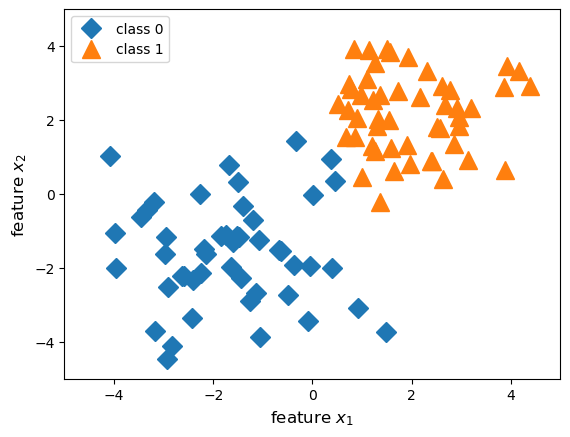

In [28]:
plt.plot(
    x_train[y_train==0, 0],  # first column of class 0
    x_train[y_train==0, 1],  # second column of class 0
    marker="D",
    markersize=10,
    linestyle="",
    label="class 0"
      ) 


plt.plot(
    x_train[y_train==1,0],
    x_train[y_train==1,1],
    marker="^",
    markersize=13,
    linestyle="",
    label="class 1"
    
      )

plt.legend(loc=2)

plt.xlim(-5,5)
plt.ylim(-5,5)

plt.xlabel("feature $x_1$",fontsize=12)
plt.ylabel("feature $x_2$",fontsize=12)

plt.grid
plt.show
    
    
    

In [67]:
class Perceptron:
    def __init__(self,n_features):
        self.features=n_features
        self.weights=[0.0 for _ in range(n_features)]
        self.bias=0.0
    def forward(

In [69]:
test= Perceptron(n_features=2)

In [71]:
test.weights

[0.0, 0.0]

In [73]:
test.bias

0.0

In [87]:
class Perceptron:
    def __init__(self,n_features):
        self.features=n_features
        self.weights=[0.0 for _ in range(n_features)]
        self.bias=0.0
    def forward(self,x):
        sum_z=self.bias
        for i,_ in enumerate(self.weights):
            sum_z += x[i] * self.weights[i]
        if sum_z>0:
            prediction=1
        else:
            prediction=0
        return prediction

In [89]:
test= Perceptron(n_features=2)
x=[1.1,1.2]
test.forward(x)

0

In [109]:
class Perceptron:
    def __init__(self,n_features):
        self.features=n_features
        self.weights=[0.0 for _ in range(n_features)]
        self.bias=0.0
    def forward(self,x):
        sum_z=self.bias
        for i,_ in enumerate(self.weights):
            sum_z += x[i] * self.weights[i]
        if sum_z>0:
            prediction=1
        else:
            prediction=0
        return prediction
    def update(self,x,true_y):
        prediction= self.forward(x)
        error= true_y - prediction
        self.bias+=error
        for i,_ in enumerate(self.weights):
              self.weights[i] += error * x[i]  # ✅ correct
        return error

In [111]:
test= Perceptron(n_features=2)
x=[1.96,0.83]
test.update(x,true_y=1)

1

In [157]:
  def train(model,all_x,all_y,epochs):
        
        for epoch in range(epochs):
            
            error_count=0
            for x,y in zip(all_x,all_y):
                error=model.update(x,y)
                error_count+=abs(error)
                print(f"epoch {epoch+1} errors {error_count}")
                

In [169]:
test= Perceptron(n_features=2)
train(model=test,all_x=x_train,all_y=y_train,epochs=3)

epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 0
epoch 1 errors 1
epoch 1 errors 1
epoch 1 errors 1
epoch 1 errors 1
epoch 1 errors 1
epoch 1 errors 1
epoch 1 errors 1
epoch 1 errors 1
epoch 1 errors 1
epoch 1 errors

In [171]:
def compute_accuracy(model,all_x,all_y):
    correct= 0.0
    for x,y in zip(all_x,all_y):
        prediction=model.forward(x)
        correct+=int(prediction==y)
    return correct/len(all_y)

In [173]:
train_acc= compute_accuracy(model=test,all_x=x_train,all_y=y_train)
train_acc

1.0

In [195]:
def plot_boundary(model):
    w1,w2=model.weights[0],model.weights[1]
    b= model.bias

    x1_min=-20
    x2_min=(-(x1_min)*(w1)-b)/w2

    x1_max=20
    x2_max=(-(x1_max)*(w1)-b)/w2

    return x1_min,x2_min,x1_max,x2_max

<function matplotlib.pyplot.show(close=None, block=None)>

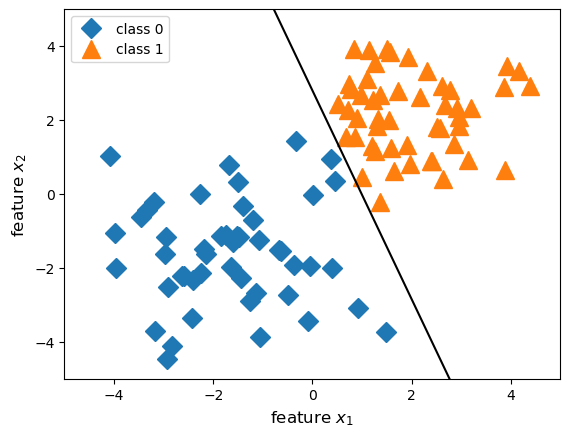

In [197]:
x1_min,x2_min,x1_max,x2_max=plot_boundary(test)

plt.plot(
    x_train[y_train==0, 0],  # first column of class 0
    x_train[y_train==0, 1],  # second column of class 0
    marker="D",
    markersize=10,
    linestyle="",
    label="class 0"
      ) 


plt.plot(
    x_train[y_train==1,0],
    x_train[y_train==1,1],
    marker="^",
    markersize=13,
    linestyle="",
    label="class 1"
    
      )

plt.legend(loc=2)
plt.plot([x1_min,x1_max],[x2_min,x2_max],color="k")
plt.xlim(-5,5)
plt.ylim(-5,5)

plt.xlabel("feature $x_1$",fontsize=12)
plt.ylabel("feature $x_2$",fontsize=12)

plt.grid
plt.show
    
    
    